<a href="https://colab.research.google.com/github/naqi72/Finetuning_TTS_Model/blob/main/ENGLISH_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers datasets soundfile accelerate speechbrain==0.5.16


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.6/630.6 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 46.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10

In [2]:

from huggingface_hub import notebook_login

notebook_login()


In [3]:
!nvidia-smi


Tue Nov  5 09:53:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
from datasets import load_dataset, Audio
dataset = load_dataset("Yassmen/TTS_English_Technical_data", split="train")
dataset


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/333 [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/469M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/466M [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/468M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/541M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9951 [00:00<?, ? examples/s]

Dataset({
    features: ['audio', 'transcription'],
    num_rows: 9951
})

In [5]:
print(dataset)


Dataset({
    features: ['audio', 'transcription'],
    num_rows: 9951
})


In [6]:
half_size = len(dataset) // 16

# Select the first half of the dataset
dataset = dataset.select(range(half_size))

print(dataset)


Dataset({
    features: ['audio', 'transcription'],
    num_rows: 621
})


In [7]:
dataset = dataset.cast_column("audio", Audio(sampling_rate=16000))


In [8]:
from transformers import SpeechT5Processor

checkpoint = "microsoft/speecht5_tts"
processor = SpeechT5Processor.from_pretrained(checkpoint)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [9]:
tokenizer = processor.tokenizer


In [10]:
dataset[2:5]


{'audio': [{'path': 'YT2-9833.wav',
   'array': array([-0.00598094,  0.03031809, -0.03093819, ..., -0.0726028 ,
          -0.07300073, -0.07294128]),
   'sampling_rate': 16000},
  {'path': 'YT2-7339.wav',
   'array': array([0.00041708, 0.0048018 , 0.01064588, ..., 0.01377195, 0.01513178,
          0.        ]),
   'sampling_rate': 16000},
  {'path': 'YT2-10540.wav',
   'array': array([ 0.13768291,  0.14736655,  0.05810779, ..., -0.02962811,
          -0.04119447, -0.04133903]),
   'sampling_rate': 16000}],
 'transcription': ["Twilio does have one of\nthose but if you were looking at one of these that didn't,",
  "plus 3 and so it's just basically it continues the generation in all the",
  'There are people, you\nmight not think about this, but there are people who are\ngoing to use your application']}

In [11]:
def extract_all_chars(batch):
    all_text = " ".join(batch["transcription"])
    vocab = list(set(all_text))
    return {"vocab": [vocab], "all_text": [all_text]}


vocabs = dataset.map(
    extract_all_chars,
    batched=True,
    batch_size=-1,
    keep_in_memory=True,
    remove_columns=dataset.column_names,
)

dataset_vocab = set(vocabs["vocab"][0])
tokenizer_vocab = {k for k, _ in tokenizer.get_vocab().items()}


Map:   0%|          | 0/621 [00:00<?, ? examples/s]

In [12]:

dataset_vocab - tokenizer_vocab


{'\n', ' ', '%', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@'}

In [13]:
import re

def normalize_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation (except apostrophes)
    text = re.sub(r'[^\w\s\']', '', text)

    # Remove extra whitespace
    text = ' '.join(text.split())

    return text

# Define a function to add the normalized_text column
def add_normalized_text(example):
    example['normalized_text'] = normalize_text(example['transcription'])
    return example

# Apply the function to the dataset
dataset = dataset.map(add_normalized_text)

# Print the first few examples to verify
print(dataset[2:5])

Map:   0%|          | 0/621 [00:00<?, ? examples/s]

{'audio': [{'path': 'YT2-9833.wav', 'array': array([-0.00598094,  0.03031809, -0.03093819, ..., -0.0726028 ,
       -0.07300073, -0.07294128]), 'sampling_rate': 16000}, {'path': 'YT2-7339.wav', 'array': array([0.00041708, 0.0048018 , 0.01064588, ..., 0.01377195, 0.01513178,
       0.        ]), 'sampling_rate': 16000}, {'path': 'YT2-10540.wav', 'array': array([ 0.13768291,  0.14736655,  0.05810779, ..., -0.02962811,
       -0.04119447, -0.04133903]), 'sampling_rate': 16000}], 'transcription': ["Twilio does have one of\nthose but if you were looking at one of these that didn't,", "plus 3 and so it's just basically it continues the generation in all the", 'There are people, you\nmight not think about this, but there are people who are\ngoing to use your application'], 'normalized_text': ["twilio does have one of those but if you were looking at one of these that didn't", "plus 3 and so it's just basically it continues the generation in all the", 'there are people you might not think abou

In [14]:
def extract_all_chars(batch):
    all_text = " ".join(batch["normalized_text"])
    vocab = list(set(all_text))
    return {"vocab": [vocab], "all_text": [all_text]}


vocabs = dataset.map(
    extract_all_chars,
    batched=True,
    batch_size=-1,
    keep_in_memory=True,
    remove_columns=dataset.column_names,
)

dataset_vocab = set(vocabs["vocab"][0])
tokenizer_vocab = {k for k, _ in tokenizer.get_vocab().items()}


Map:   0%|          | 0/621 [00:00<?, ? examples/s]

In [15]:
dataset_vocab - tokenizer_vocab


{' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [16]:
replacements = [
    ('API', 'A-P-I'),      # API remains as API
    ('OAuth', 'o-auth'),  # OAuth to oauth
    ('REST', 'rest'),    # REST to rest
    ('SQL', 'S-Q-L'),      # SQL remains as SQL
    ('CUDA', 'koodaa'),  # CUDA to koodaa
    ('TTS', 'T-T-S'),      # TTS remains as TTS
    ('HTTP', 'H T T P'),    # HTTP remains as HTTP
    ('JSON', 'J-SON'),    # JSON remains as JSON
    ('XML', 'X-M-L'),      # XML remains as XML
    ('SSH', 'S-S-H'),      # SSH remains as SSH
    ('SSL', 'S-S-L'),      # SSL remains as SSL
    ('DNS', 'D-N-S'),      # DNS remains as DNS
    ('GPU', 'G-P-U'),      # GPU remains as GPU
    ('CPU', 'C-P-U'),      # CPU remains as CPU
    ('FTP', 'F-T-P'),      # FTP remains as FTP
    ('VPN', 'V-P-N'),      # VPN remains as VPN
    ('TCP/IP', 'T-C-P/I-P'),# TCP/IP remains as TCP/IP
    ('UI', 'U-I'),        # UI remains as UI
    ('UX', 'U-X'),        # UX remains as UX
    ('IDE', 'I-D-E'),      # IDE remains as IDE
    ('Git', 'Git'),      # Git remains as Git
    ('Docker', 'Docker'),# Docker remains as Docker
    ('Kubernetes', 'kubernetes'), # Kubernetes to kubernetes
    ('PyTorch', 'pytorch'), # PyTorch to pytorch
    ('TensorFlow', 'tensorflow'), # TensorFlow to tensorflow
    ('GraphQL', 'graphql'), # GraphQL to graphql
    ('CI/CD', 'ci-cd'),   # CI/CD to ci-cd
    ('JWT', 'J-W-T'),       # JWT remains as JWT
    ('WebSocket', 'websocket'), # WebSocket to websocket
    ('0', 'zero'),
    ('1', 'one'),
    ('2', 'two'),
    ('3', 'three'),
    ('4', 'four'),
    ('5', 'five'),
    ('6', 'six'),
    ('7', 'seven'),
    ('8', 'eight'),
    ('9', 'nine'),
]


def cleanup_text(inputs):
    for src, dst in replacements:
        inputs["normalized_text"] = inputs["normalized_text"].replace(src, dst)
    return inputs

dataset = dataset.map(cleanup_text)


Map:   0%|          | 0/621 [00:00<?, ? examples/s]

In [17]:
import os
import torch
from speechbrain.pretrained import EncoderClassifier

spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

device = "cuda" if torch.cuda.is_available() else "cpu"
speaker_model = EncoderClassifier.from_hparams(
    source=spk_model_name,
    run_opts={"device": device},
    savedir=os.path.join("/tmp", spk_model_name),
)


def create_speaker_embedding(waveform):
    with torch.no_grad():
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)
        speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()
    return speaker_embeddings


hyperparams.yaml:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

embedding_model.ckpt:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/15.9M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/speechbrain/utils/checkpoints.py:147: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(path, map_location=device), strict=Fal

In [18]:
def prepare_dataset(example):
    # load the audio data; if necessary, this resamples the audio to 16kHz
    audio = example["audio"]

    # feature extraction and tokenization
    example = processor(
        text=example["normalized_text"],
        audio_target=audio["array"],
        sampling_rate=audio["sampling_rate"],
        return_attention_mask=False,
    )

    # strip off the batch dimension
    example["labels"] = example["labels"][0]

    # use SpeechBrain to obtain x-vector
    example["speaker_embeddings"] = create_speaker_embedding(audio["array"])

    return example


In [19]:
processed_example = prepare_dataset(dataset[0])


In [20]:
list(processed_example.keys())


['input_ids', 'labels', 'speaker_embeddings']

In [21]:

processed_example["speaker_embeddings"].shape


(512,)

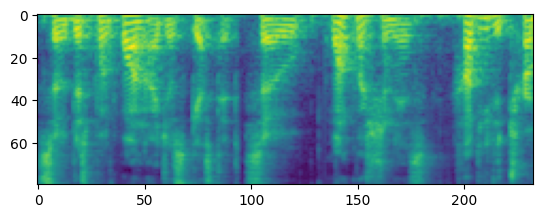

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(processed_example["labels"].T)
plt.show()


In [ ]:
from transformers import SpeechT5HifiGan
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

In [ ]:
spectrogram = torch.tensor(processed_example["labels"])
with torch.no_grad():
    speech = vocoder(spectrogram)


model.safetensors:   0%|          | 0.00/50.6M [00:00<?, ?B/s]

In [ ]:
from IPython.display import Audio
Audio(speech.cpu().numpy(), rate=16000)


In [22]:
dataset = dataset.map(
    prepare_dataset, remove_columns=dataset.column_names,
)

Map:   0%|          | 0/621 [00:00<?, ? examples/s]

In [23]:
def is_not_too_long(input_ids):
    input_length = len(input_ids)
    return input_length < 200

dataset = dataset.filter(is_not_too_long, input_columns=["input_ids"])

Filter:   0%|          | 0/621 [00:00<?, ? examples/s]

In [24]:
dataset = dataset.train_test_split(test_size=0.1)


In [25]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union


@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(
        self, features: List[Dict[str, Union[List[int], torch.Tensor]]]
    ) -> Dict[str, torch.Tensor]:
        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # collate the inputs and targets into a batch
        batch = processor.pad(
            input_ids=input_ids, labels=label_features, return_tensors="pt"
        )

        # replace padding with -100 to ignore loss correctly
        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        # not used during fine-tuning
        del batch["decoder_attention_mask"]

        # round down target lengths to multiple of reduction factor
        if model.config.reduction_factor > 1:
            target_lengths = torch.tensor(
                [len(feature["input_values"]) for feature in label_features]
            )
            target_lengths = target_lengths.new(
                [
                    length - length % model.config.reduction_factor
                    for length in target_lengths
                ]
            )
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # also add in the speaker embeddings
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch

In [26]:
data_collator = TTSDataCollatorWithPadding(processor=processor)


In [27]:
from transformers import SpeechT5ForTextToSpeech

model = SpeechT5ForTextToSpeech.from_pretrained(checkpoint)


config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

In [28]:
from functools import partial

# disable cache during training since it's incompatible with gradient checkpointing
model.config.use_cache = False

# set language and task for generation and re-enable cache
model.generate = partial(model.generate, use_cache=True)


In [29]:
from huggingface_hub import notebook_login

notebook_login()


In [30]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="speecht5_finetuned_techincal_data",
    per_device_train_batch_size=4,
    gradient_accumulation_steps=8,
    learning_rate=1e-4,
    warmup_steps=100,
    max_steps=500,
    gradient_checkpointing=True,
    fp16=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=2,
    save_steps=100,
    eval_steps=100,
    logging_steps=25,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    greater_is_better=False,
    label_names=["labels"],
    push_to_hub=True,
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [31]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    data_collator=data_collator,
    tokenizer=processor,
)


/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
max_steps is given, it will override any value given in num_train_epochs


In [32]:
trainer.train()


/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Step,Training Loss,Validation Loss
100,0.550500,0.515736
200,0.483000,0.519941
300,0.460800,0.520561
400,0.435100,0.537045
500,0.426200,0.541498


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 1876}
Your generation config was originally created from the model config, but the model config has changed since then. Unless you pass the `generation_config` argument to this model's `generate` calls, they will revert to the legacy behavior where the base `generate` parameterization is loaded from the model config instead. To avoid this behavior and this warning, we recommend you to overwrite the generation config model attribute before calling the model's `save_pretrained`, preferably also removing any generation kwargs from the model config. This warning will be raised to an exception in v4.41.
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/e

TrainOutput(global_step=500, training_loss=0.5071731452941894, metrics={'train_runtime': 1025.939, 'train_samples_per_second': 15.595, 'train_steps_per_second': 0.487, 'total_flos': 1264978753210656.0, 'train_loss': 0.5071731452941894, 'epoch': 28.571428571428573})

In [33]:
trainer.push_to_hub()


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 1876}
Your generation config was originally created from the model config, but the model config has changed since then. Unless you pass the `generation_config` argument to this model's `generate` calls, they will revert to the legacy behavior where the base `generate` parameterization is loaded from the model config instead. To avoid this behavior and this warning, we recommend you to overwrite the generation config model attribute before calling the model's `save_pretrained`, preferably also removing any generation kwargs from the model config. This warning will be raised to an exception in v4.41.


events.out.tfevents.1730800881.59828b83cf8c.301.0:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/naqi72/speecht5_finetuned_techincal_data/commit/b425b716a3ba902b51377ce26b83a3d06afab727', commit_message='End of training', commit_description='', oid='b425b716a3ba902b51377ce26b83a3d06afab727', pr_url=None, pr_revision=None, pr_num=None)

In [34]:
model = SpeechT5ForTextToSpeech.from_pretrained("naqi72/speecht5_finetuned_techincal_data")


config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/578M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

In [36]:
example = dataset["test"][60]
speaker_embeddings = torch.tensor(example["speaker_embeddings"]).unsqueeze(0)


In [37]:
text = "To accelerate deep learning models, CUDA is used for GPU computation."


In [38]:
number_words = {
    0: "zero", 1: "one", 2: "two", 3: "three", 4: "four", 5: "five", 6: "six", 7: "seven", 8: "eight", 9: "nine", '-': " ",
}

def number_to_words(number):
    if number < 20:
        return number_words[number]
    elif number < 100:
        tens, unit = divmod(number, 10)
        return number_words[tens * 10] + (" " + number_words[unit] if unit else "")
    elif number < 1000:
        hundreds, remainder = divmod(number, 100)
        return (number_words[hundreds] + " yüz" if hundreds > 1 else "yüz") + (" " + number_to_words(remainder) if remainder else "")
    elif number < 1000000:
        thousands, remainder = divmod(number, 1000)
        return (number_to_words(thousands) + " bin" if thousands > 1 else "bin") + (" " + number_to_words(remainder) if remainder else "")
    elif number < 1000000000:
        millions, remainder = divmod(number, 1000000)
        return number_to_words(millions) + " milyon" + (" " + number_to_words(remainder) if remainder else "")
    elif number < 1000000000000:
        billions, remainder = divmod(number, 1000000000)
        return number_to_words(billions) + " milyar" + (" " + number_to_words(remainder) if remainder else "")
    else:
        return str(number)

def replace_numbers_with_words(text):

    def replace(match):
        number = int(match.group())
        return number_to_words(number)

    # Find the numbers and change with words.
    result = re.sub(r'\b\d+\b', replace, text)

    return result


In [39]:
def cleanup_text(text):
    for src, dst in replacements:
        text = text.replace(src, dst)
    return text


In [40]:
converted_text = replace_numbers_with_words(text)
cleaned_text = cleanup_text(converted_text)
final_text = normalize_text(cleaned_text)
final_text


'to accelerate deep learning models koodaa is used for gpu computation'

In [41]:
inputs = processor(text=final_text, return_tensors="pt")


In [42]:
from transformers import SpeechT5HifiGan

vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")
speech = model.generate_speech(inputs["input_ids"], speaker_embeddings, vocoder=vocoder)


config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

In [44]:
from IPython.display import Audio
import soundfile as sf

Audio(speech.numpy(), rate=16000)
# Save the audio to a file (e.g., 'output.wav')
sf.write('output.wav', speech.numpy(), 16000)


In [45]:
from IPython.display import Audio
Audio(speech.numpy(), rate=16000)


In [46]:
import time
start_time = time.time()

# Run inference
from IPython.display import Audio
Audio(speech.numpy(), rate=16000)

# Stop the timer
end_time = time.time()

# Calculate inference time
inference_time = end_time - start_time
print(f"Inference Time: {inference_time:.4f} seconds")

Inference Time: 0.0010 seconds
